## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6
### Loistic Regression

3. ใช้ logistic regression แก้ปัญหา handwritten digit recognition จากชุดข้อมูล MNIST โดยทำ 2 แบบจำลอง คือ binary classification และ multi-class classification โดย binary classification ให้เลือกข้อมูลออกมาสอง class เช่น classify รูปเลข 0 และ 1 เป็นต้น ขณะที่ multi-class classification ให้ classify เลข 0-9 ออกจากกันให้ได้ ทั้งสองแบบจำลองให้นำ weight มา plot เป็นรูปเพื่อแสดงความเข้าใจการทำงานของ weight ด้วย

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

- โหลดชุดข้อมูล MNIST

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:10000,:,:]
X_test = X_test[:5000,:,:]
y_train = y_train[:10000]
y_test  = y_test[:5000]

X_train.shape

(10000, 28, 28)

In [21]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
def loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [24]:
def gradient_descent(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias



In [25]:
def predict_binary(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return y_pred

def predict(X, classifiers):
    m = X.shape[0]
    num_classifiers = len(classifiers)
    predictions = np.zeros((m, num_classifiers))

    for i, (weights, bias) in enumerate(classifiers):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        predictions[:, i] = y_pred

    return np.argmax(predictions, axis=1)



float64
Class =  0
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0

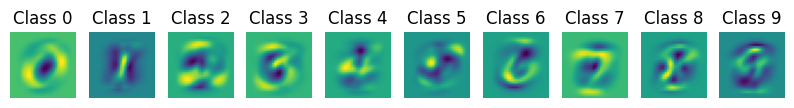

In [26]:
def logistic_regression_multiclass_mnist():

    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # แปลงข้อมูล 28x28 เป็นเวกเตอร์ 784 มิติ
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
    print(X_test.dtype)

    # One-vs-Rest (OvR) Approach
    num_classes = 10
    classifiers = []
    learning_rate = 0.1
    epochs = 100

    for i in range(num_classes):
        y_train_binary = (y_train == i).astype(int)
        print("Class = ", i)
        for z in y_train_binary:
            print(z, end=' ' )
        print()
        for z in y_train:
            print(z, end=' ' )
        print()
        weights, bias = gradient_descent(X_train, y_train_binary, learning_rate, epochs)
        classifiers.append((weights, bias))

    # ทดสอบโมเดล
    predictions = predict(X_test, classifiers)

    accuracy = np.mean(predictions == y_test)
    print("Accuracy:", accuracy)

    # แสดงน้ำหนักของแต่ละคลาส
    plt.figure(figsize=(10, 10))
    for i in range(num_classes):
        plt.subplot(1, num_classes, i + 1)
        weight_image = classifiers[i][0].reshape(28, 28)
        plt.imshow(weight_image, cmap='viridis')
        plt.title(f'Class {i}')
        plt.axis('off')
    plt.show()

logistic_regression_multiclass_mnist()

Accuracy: 0.9990543735224586


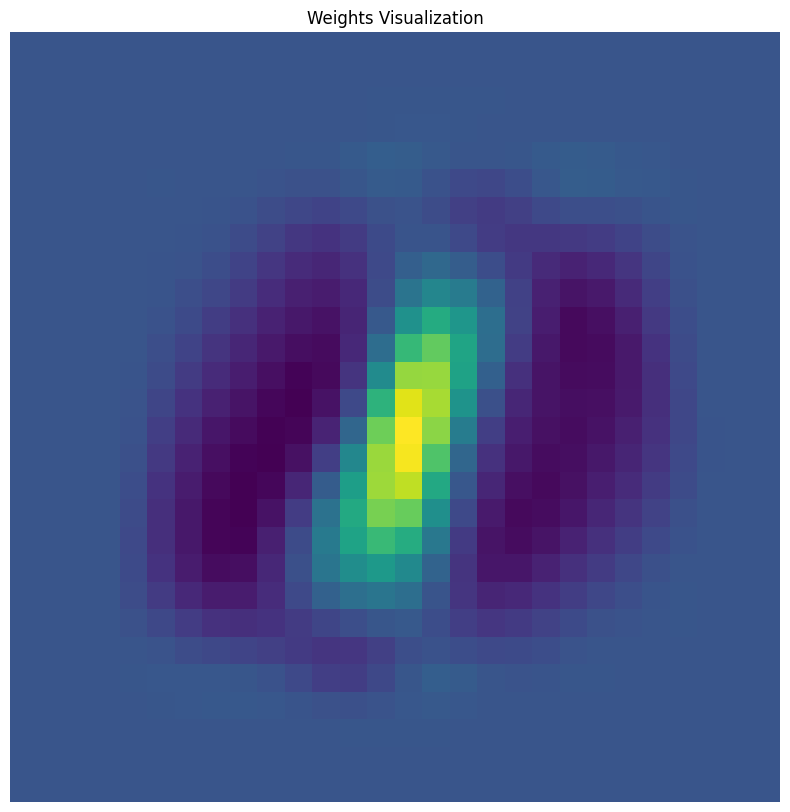

In [27]:
def logistic_regression_binary_mnist():
    # โหลดข้อมูล MNIST
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # เลือกเฉพาะเลข 0 และ 1
    filter_train = (y_train == 0) | (y_train == 1)
    filter_test = (y_test == 0) | (y_test == 1)
    X_train, y_train = X_train[filter_train], y_train[filter_train]
    X_test, y_test = X_test[filter_test], y_test[filter_test]

    # แปลงข้อมูล 28x28 เป็นเวกเตอร์ 784 มิติ
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

    # ป้ายกำกับเป็น 0 และ 1
    y_train = (y_train == 1).astype(int)
    y_test = (y_test == 1).astype(int)

    # ฝึกโมเดล
    learning_rate = 0.1
    epochs = 100
    weights, bias = gradient_descent(X_train, y_train, learning_rate, epochs)

    # ทดสอบโมเดล
    y_pred = predict_binary(X_test, weights, bias)
    predictions = (y_pred >= 0.5).astype(int)

    accuracy = np.mean(predictions == y_test)
    print("Accuracy:", accuracy)

    # แสดงน้ำหนักของโมเดล
    plt.figure(figsize=(10, 10))
    weight_image = weights.reshape(28, 28)
    plt.imshow(weight_image, cmap='45')
    plt.title('Weights Visualization')
    plt.axis('off')
    plt.show()

logistic_regression_binary_mnist()
